# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

C:\Users\Grigor\.conda\envs\ADS_502\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Grigor\.conda\envs\ADS_502\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Grigor\.conda\envs\ADS_502\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [28]:
# Add any additional import statements you need here

import matplotlib.pyplot as plt



In [3]:
# change `data_location` to the location of the folder on your machine.
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Module_6/M1_Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [17]:
artists_files = {'robyn':"robynkonichiwa_followers_data.txt",
           'cher':"cher_followers_data.txt"} 
# we'll use this dictionary to hold both the artist name and the link on AZlyrics

In [18]:
# Read in the lyrics data
artists = []
songs = []
lyrics = []

for item in os.listdir(data_location + lyrics_folder) :
    if os.path.isdir(data_location + lyrics_folder + item) :
        for lyric_page in os.listdir(data_location + lyrics_folder + item) :
            artist, song = lyric_page.split("_")
            
            song = song.replace(".txt", "")
            
            artists.append(artist)
            songs.append(song)
            
            with open(data_location +lyrics_folder +item + "/" +lyric_page) as infile :
                next(infile)
                next(infile)
                next(infile)
                next(infile)
                
                lyrics.append(infile.read())
                
lyrics_data = pd.DataFrame()
lyrics_data['artist'] = artists
lyrics_data['song'] = songs
lyrics_data['lyrics'] = lyrics

In [19]:
# Read in the twitter data
twitter_data = pd.read_csv(data_location + twitter_folder + artists_files['cher'],
                          sep = "\t",
                          quoting = 3)
twitter_data['artist'] = "cher"

In [20]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artists_files['robyn'],
                          sep = "\t",
                          quoting = 3)
twitter_data_2['artist'] = "robyn"
twitter_data = pd.concat([twitter_data, twitter_data_2])
del(twitter_data_2)

In [21]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

sentiment = dict()

with open(positive_words_file, 'r') as infile :
    for idx, line in enumerate(infile.readlines()) :
        if line[0] == ";" :
            continue
            
        line.strip()
        
        if line and line.isalpha() :
            sentiment[line.strip()] = 1
            
with open(negative_words_file, 'r') as infile :
    for idx, line in enumerate(infile.readlines()) :
        if line[0] == ";" :
            continue
            
        line.strip()
        
        if line and line.isalpha() :
            sentiment[line.strip()] = -1     

with open(tidy_text_file, 'r') as infile :
    next(infile)
    for line in infile.readlines() :
        word, sent, lexicon = line.strip().split("\t")
        
        if sent == "negative" :
            sentiment[word] = -1
        elif sent == "positive" :
            sentiment[word] = 1
        else :
            print(f"Got {word}, with sentiment {sentiment}.")

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [22]:
# your code here
def get_sentiment(text, sent = sentiment) :
    text = [w.lower() for w in text.split()]
    
    sentiment = sum([sent[word] for word in text if word in sent])
    
    return(sentiment)

In [23]:
lyrics_data['sentiment'] = lyrics_data['lyrics'].apply(get_sentiment)

In [24]:
avg_sentiment = lyrics_data.groupby('artist')['sentiment'].mean()
avg_sentiment

Series([], Name: sentiment, dtype: float64)

In [25]:
first_artist = lyrics_data[lyrics_data['artist'] == 'cher']

sorted_by_sentiment = first_artist.sort_values(by = 'sentiment')
top_3_songs = sorted_by_sentiment.tail(3)
bottom_3_songs = sorted_by_sentiment.head(3)

for i, rpw in top_3_songs.iterrows():
    print(row['lyrics'])
    print("-"*50)
    
print("-"*50)
print("-"*50)
print("-"*50)

for i, row in bottom_3_songs.iterrows():
    print(row['lyrics'])
    print("-"*50)

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


In [26]:
print(top_3_songs.song)
bottom_3_songs.song

Series([], Name: song, dtype: float64)


Series([], Name: song, dtype: float64)

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: I was unable to answer this question as my code was not able to print out the results. Bu looking at the office hour 
video it appears robyn was higher.

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: I was unable to answer this question as my code was not able to print out the results

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A:I was unable to answer this question as my code was not able to print out the results

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

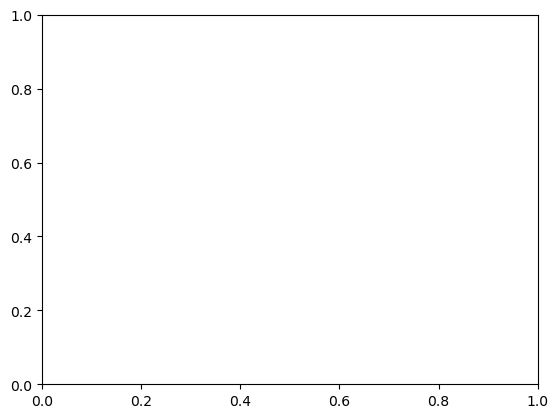

In [29]:
# your code here
sns.histplot(data = lyrics_data, x = 'sentiment', hue = 'artist', kde = True)
plt.show()

In [30]:
pos_emoji = ['❤️','😍','😊','👏','😎','🔥','😆','💛','☺️','🙏']
neg_emoji = ['😱', '😟','😡','😞','😢','😱','🔴','👎','❌','😦']

emoji_sentiment = dict(zip(pos_emoji, [1]*15))
emoji_sentiment.update(dict(zip(neg_emoji,[-1]*15)))

In [31]:
emoji_sentiment

{'❤️': 1,
 '😍': 1,
 '😊': 1,
 '👏': 1,
 '😎': 1,
 '🔥': 1,
 '😆': 1,
 '💛': 1,
 '☺️': 1,
 '🙏': 1,
 '😱': -1,
 '😟': -1,
 '😡': -1,
 '😞': -1,
 '😢': -1,
 '🔴': -1,
 '👎': -1,
 '❌': -1,
 '😦': -1}

In [32]:
def get_desc_sentiment(desc,sent=emoji_sentiment) :
    
    sentiment = sum([sent[ch] for ch in str(desc) if ch in sent])
    return(sentiment)

def extract_emojis(desc,emoji_list) :
    emojis = [ch for ch in str(desc) if ch in emjoi_list]
    
    return(emojis)

In [33]:
twitter_data['sentiment'] = twitter_data.description.apply(get_desc_sentiment)
twitter_data['positive_emoji'] = twitter_data.description.apply(extract_emojis, args = (tokenizer, 50))
twitter_data['negative_emoji'] = twitter_data.description.apply(extract_emojis, args = (tokenizer, 50))

NameError: name 'tokenizer' is not defined

In [34]:
twitter_data.query('sentiment < 0').head()

,screen_name,name,id,location,followers_count,friends_count,description,artist,sentiment
38,AdamTheeStan,CrackHeadBarbie,1363710785663488001,NaN,10,37,He/Him | 🏳️‍🌈 | AvaLance worshipper | Legends ...,cher,-1
271,CynchaBlue,Cyncha,1500244117871288322,NaN,151,430,"Grandma, great grandma, Air Force veteran, ret...",cher,-1
736,controvers810,Lady_controvers810,1502693495680684040,NaN,1,48,😈😈😈😈😈😈😘😘😘😘😍😍😝😜😜😜😜😜👹👹😱😱😱😱😺😺🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀,cher,-2
748,sunsungirly,sun,115539533,NaN,9484,9590,I stand with Ukraine 🇺🇦 Resister Sister! Biden...,cher,-1
6180,reedcliffe83,ἄνθος VII 🇺🇦🏳️‍🌈🏳️‍⚧️,796770404148899840,Somewhere Over The🌈Rainbow,9242,292,🎧#musicmap🗺 🏳️‍🌈⚧🏳️‍⚧️ 🎈🇺🇦🎈✨🎶🦋🎼🦋🎶✨🫶🧘🫶🎈https://...,cher,-1


In [35]:
twitter_data.groupby('artist').sentiment.mean()

artist
cher     0.009756
robyn    0.004886
Name: sentiment, dtype: float64

In [36]:
def get_top_n_emojis(emoji_list, n =3):
    emoji_count = {}
    for emoji in emoji_list :
        if emoji in emoji_count :
            emoji_count[emoji] +=1
        else:
            emoji_count[emoji] = 1
    sorted_emojis = sorted(emoji_counts.items(), key = lambda x: x[1], reverse = True)
    top_emojis = [emoji for emoji, count in sorted_emojis[:n]]
    return top_n_emojis

Q: What is the average sentiment of your two artists? 

A: cher     0.009756
robyn    0.004886

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: I was unable to answer that question

